### Setting up

In [96]:
# import math functions
from math import sqrt, exp as mexp

# import numpy functions
from numpy import (
    vectorize, linspace, logspace, arange, zeros, log10, fill_diagonal, 
    exp, pi, set_printoptions, log2, inf, array, ndarray, diagonal,
    cos, sqrt as nsqrt, log
)
from numpy.linalg import solve, norm, inv, eigvals


import sys

# set to print lines to large width
set_printoptions(linewidth=500)

from itertools import cycle

%matplotlib inline
from matplotlib.style import use
use("seaborn")

# import the default plot settings
from pltconfig import *

# Problem 3

## Part A

In [165]:
# define an object for this question
class q3a(object):
    
    def __init__(self, a=-2.0, b=1.0, m=50, alpha=-1.0, beta_prime=0.5):
        self.a = a
        self.b = b
        self.m = m
        self.alpha = alpha
        self.beta_prime = beta_prime
        self.h = (b-a)/(m+1) # step size
        self.xpts = a + (arange(m+2))*self.h
        self.U = self.get_U()
    
    def get_all_parameters (self):
        return self.a, self.b, self.m, self.h, self.xpts
    
    def construct_A(self):
    
        m = self.m
        h = self.h

        # Initialize the matrix A
        A = zeros((m+2, m+2))

        # First define the matrix A
        # define the lower and upper diagonals, respectively
        fill_diagonal(A[2:-1,1:-1], 1.0); fill_diagonal(A[1:,2:-1], 1.0)
        # define the on-diagonal terms
        fill_diagonal(A[1:-1,1:-1], -2*(1-8*h*h+4*(arange(1,m+1))*h*h*h))
        # fill_diagonal(A[1:-1,1:-1], -2.0)

        # define the left-hand boundaries
        A[0,0] = 1.0; A[1,0] = 1.0
        # define the right-hand boundaries
        A[-2,-1] = 1.0; A[-1, -2] = -1.0; A[-1,-1] = 1.0

        # scale entire matrix by 1./h^2
        A *= 1./(h*h)

        return A
    
    def construct_F(self):
    
        m = self.m
        h = self.h
        alpha = self.alpha
        beta_prime = self.beta_prime

        # initialize the right-hand side
        F = zeros(m+2)

        # define the RHS in the interior of the domain
        F[1:-1] = 16*((arange(1,m+1))*h-1)-4*((arange(1,m+1))**2)*h*h

        # define the LHS and RHS boundary terms, respectively
        F[0] = alpha/(h*h); F[-1] = beta_prime/h

        return F
    
    def get_U(self):
    
        A = self.construct_A()
        F = self.construct_F()
        
        return solve(A,F)
    
    def get_plot(self):
        
        fig, ax = subplots(1,1, figsize=(10,10))
        ax.plot(self.xpts, self.U, lw=3.0, label="Approx.")
        ax.plot(self.xpts, 0.5*self.xpts, lw=3.0, ls="--", label="Exact")

        ax.legend(loc=0, prop={"size":18})
        ax.set_ylabel(r"$U[x]$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        ax.grid(True)
        
        fig.tight_layout()
        fig.savefig("q3a_fig.pdf")

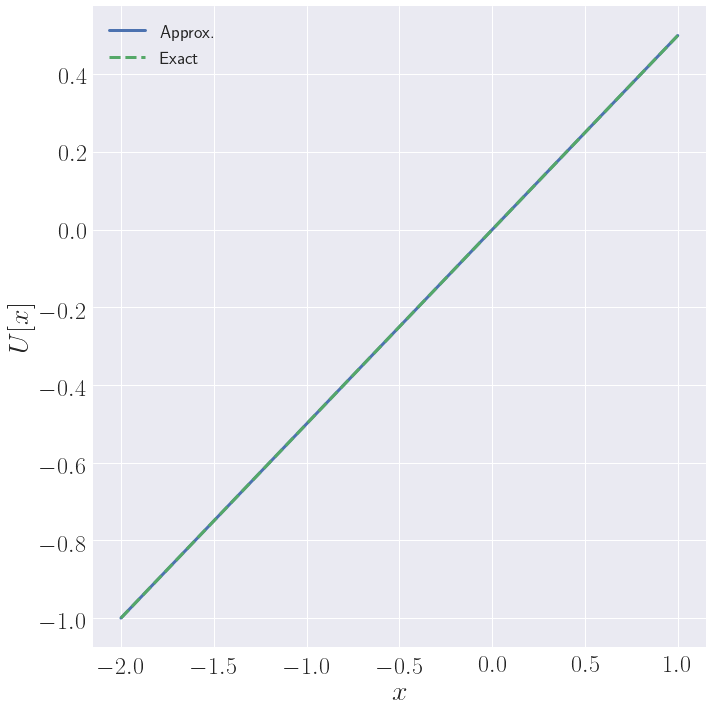

In [166]:
soln_3a = q3a()
soln_3a.get_plot()

## Part B

In [156]:
class q3b(object):
    
    def __init__(self, a=-2.0, b=1.0, m=50, alpha=0.0, beta_prime=2.0):
        self.a = a
        self.b = b
        self.m = m
        self.alpha = alpha
        self.beta_prime = beta_prime
        self.h = (b-a)/(m+1) # step size
        self.xpts = a + (arange(m+2))*self.h
        self.U = self.get_U()
    
    def get_all_parameters (self):
        return self.a, self.b, self.m, self.h, self.xpts
    
    def construct_A(self):
    
        m = self.m
        h = self.h

        # Initialize the matrix A
        A = zeros((m+2, m+2))

        # First define the matrix A
        # define the lower and upper diagonals, respectively
        fill_diagonal(A[2:-1,1:-1], 1.0); fill_diagonal(A[1:,2:-1], 1.0)
        # define the on-diagonal terms
        fill_diagonal(A[1:-1,1:-1], -2*(1-8*h*h+4*(arange(1,m+1))*h*h*h))
        
        # define the left-hand boundaries
        A[0,0] = 1.0; A[1,0] = 1.0
        # define the right-hand boundaries
        A[-2,-1] = 1.0; A[-1, -2] = -1.0; A[-1,-1] = 1.0

        # scale entire matrix by 1./h^2
        A *= 1./(h*h)

        return A
    
    def get_Ainv(self):
        
        A = self.construct_A()
        
        return inv(A)
    
    def construct_F(self):
        
        # get parameters
        m = self.m
        h = self.h
        alpha = self.alpha
        beta_prime = self.beta_prime
        
        # re-define the right-hand side
        F = zeros(m+2)
        # define the RHS in the interior of the domain
        F[1:-1] = 16*((arange(1,m+1))*h-1)-4*((arange(1,m+1))**2)*h*h
        # define the LHS and RHS boundary terms, respectively
        F[0] = alpha/(h*h); F[-1] = beta_prime/h
        
        return F
    
    def get_U(self):
    
        A = self.construct_A()
        F = self.construct_F()
        
        return solve(A,F)
    
    def get_plot(self):
        
        fig, ax = subplots(1,1, figsize=(10,10))
        ax.plot(self.xpts, self.U, lw=3.0)

        ax.set_ylabel(r"$U[x]$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        ax.grid(True)
        
        fig.tight_layout()
        fig.savefig("q3b_sample_fig.pdf")

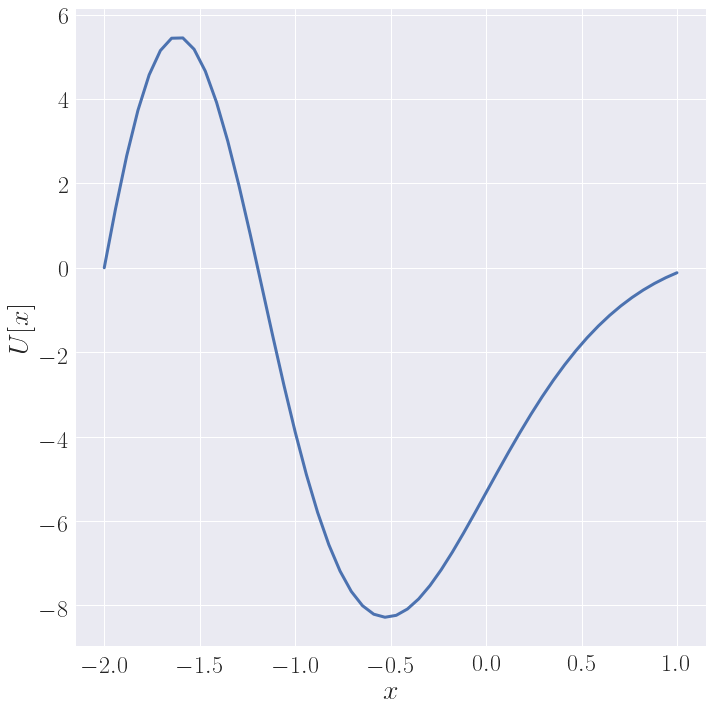

In [157]:
sample_3b = q3b()
sample_3b.get_plot()

In [158]:
def q3b_compute_grid_error_scaling(n=9):
    
        # initialize array for storage
        hvals = zeros(n)
        error_array1_2norm = zeros(n)
        error_array2_2norm = zeros(n)
        error_array1_infnorm = zeros(n)
        error_array2_infnorm = zeros(n)

        # set the number of initial number of internal points
        m_coarse = (2**2)
        # solve on initial mesh
        soln_coarse = q3b(m=m_coarse)

        print(f"m    h        2-norm error  inf-norm error  ratio (2-norm)  ratio (inf-norm)  order (2-norm)  order (inf-norm)")
        
        for i in range(n):

            # define the finer grids
            m_fine = 2*m_coarse + 1

            # construct the meshes and solve 
            soln_fine = q3b(m=m_fine)

            # compute the errors using the grid-2norm
            error_array1_2norm[i] = sqrt(soln_coarse.h)*norm(soln_coarse.U-soln_fine.U[::2], ord=2)

            # compute the errors using the infinity-norm
            error_array1_infnorm[i] = norm(soln_coarse.U-soln_fine.U[::2], ord=inf)

            # record the spacing
            hvals[i] = soln_coarse.h

            # set the current fine grid as the coarse grid for next iteration
            m_coarse = m_fine 
            soln_coarse = soln_fine
            
            if (i > 0):
                print(
                    f"{m_coarse:<5d}"
                    + f"{hvals[i]:<9.5f}"
                    + f"{error_array1_2norm[i]:<14.2e}"
                    + f"{error_array1_infnorm[i]:<16.2e}"
                    + f"{error_array1_2norm[i]/error_array1_2norm[i-1]:<16.5f}"
                    + f"{error_array1_infnorm[i]/error_array1_infnorm[i-1]:<18.5f}"
                    + f"{-log((error_array1_2norm[i]/error_array1_2norm[i-1]).__abs__())/log(2):<16.5f}"
                    + f"{-log((error_array1_infnorm[i]/error_array1_infnorm[i-1]).__abs__())/log(2):<16.5f}"
                    )
            else:
                print(
                    f"{m_coarse:<5d}"
                    + f"{hvals[i]:<9.5f}"
                    + f"{error_array1_2norm[i]:<14.2e}"
                    + f"{error_array1_infnorm[i]:<16.2e}"
                    )

        return hvals, error_array1_2norm, error_array1_infnorm

In [159]:
def plot_3b_part1():
    
    hvals, error_array1_2norm, error_array1_infnorm = q3b_compute_grid_error_scaling()

    fig, ax = subplots(1,1,figsize=(10,10))

    ax.loglog(hvals, error_array1_2norm, lw=3.0, label="2-norm")
    ax.loglog(hvals, error_array1_infnorm, lw=3.0, label="inf-norm")

    ax.loglog(hvals, 10*hvals*hvals, lw=3.0, ls="--", color="gray", label=r"reference $h^{2}$ line")
    
    ax.legend(loc=0, prop={"size":18})
    ax.set_ylabel(r"$E(h)$", fontsize=28)
    ax.set_xlabel(r"$h$", fontsize=28)
    ax.tick_params(labelsize=28)
    ax.grid(True)

    fig.tight_layout()
    fig.savefig("q3b_part1_fig.pdf")

m    h        2-norm error  inf-norm error  ratio (2-norm)  ratio (inf-norm)  order (2-norm)  order (inf-norm)
9    0.60000  1.58e+01      1.26e+01        
19   0.30000  2.84e+01      2.63e+01        1.79702         2.09293           -0.84560        -1.06552        
39   0.15000  3.09e+00      2.86e+00        0.10860         0.10880           3.20296         3.20023         
79   0.07500  5.27e-01      4.87e-01        0.17062         0.17035           2.55117         2.55346         
159  0.03750  1.29e-01      1.19e-01        0.24522         0.24378           2.02783         2.03636         
319  0.01875  3.61e-02      3.28e-02        0.27965         0.27635           1.83828         1.85542         
639  0.00937  1.13e-02      1.01e-02        0.31302         0.30699           1.67566         1.70374         
1279 0.00469  4.01e-03      3.48e-03        0.35440         0.34543           1.49654         1.53356         
2559 0.00234  1.60e-03      1.35e-03        0.39933         0.38911

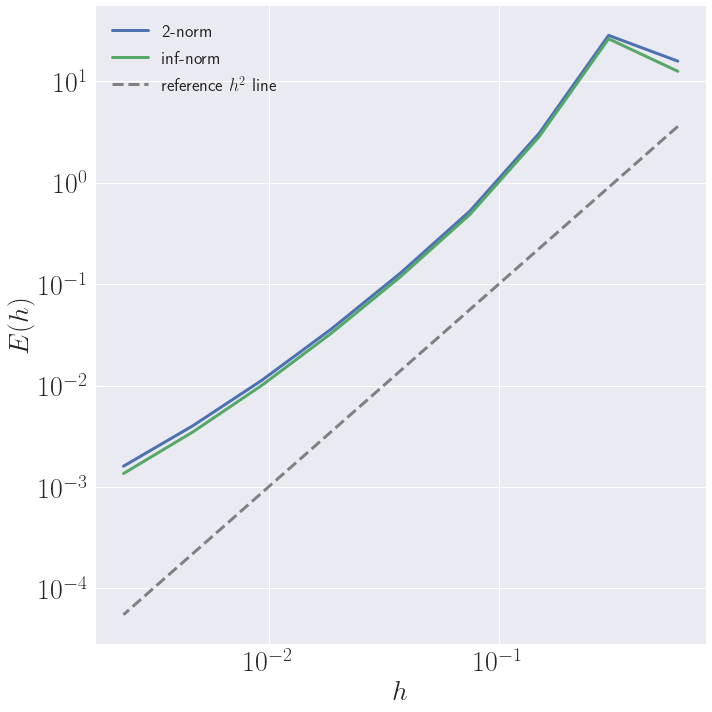

In [160]:
plot_3b_part1()

In [93]:
def compute_A_stability(n=9):
    
        # initialize array for storage
        hvals = zeros(n)
        matrix_2norm = zeros(n)
        matrix_infnorm = zeros(n)

        # set the number of initial number of internal points
        m_coarse = (2**2)
        # solve on initial mesh
        soln_coarse = q3b(m=m_coarse)
        
        for i in range(n):

            # define the finer grids
            m_fine = 2*m_coarse + 1

            # record the spacing
            hvals[i] = soln_coarse.h
            
            # get the inverse of A
            Ainv = soln_coarse.get_Ainv()
            
            # Find the eigenvalues of A inverse
            eigenvalues = eigvals(Ainv)
            
            # record the matrix 2-norm
            matrix_2norm[i] = eigenvalues.__abs__().max()
            # record the matrix inf-norm
            matrix_infnorm[i] = Ainv.__abs__().sum(axis=1).max()
            
            # set the current fine grid as the coarse grid for next iteration
            m_coarse = m_fine 
            soln_coarse = q3b(m=m_coarse)
            
        return hvals, matrix_2norm, matrix_infnorm

In [97]:
def plot_3b_part2():
    
    hvals, matrix_2norm, matrix_infnorm = compute_A_stability()

    fig, ax = subplots(1,1,figsize=(10,10))

    ax.loglog(hvals, matrix_2norm, lw=3.0, label="2-norm")
    ax.loglog(hvals, matrix_infnorm, lw=3.0, label="inf-norm")

#     ax.loglog(hvals, 10*hvals*hvals, lw=3.0, ls="--", color="gray", label=r"reference $h^{2}$ line")
    
    ax.legend(loc=0, prop={"size":18})
    ax.set_ylabel(r"$||(A^{h})^{-1}||$", fontsize=28)
    ax.set_xlabel(r"$h$", fontsize=28)
    ax.tick_params(labelsize=28)
    ax.grid(True)

    fig.tight_layout()
    fig.savefig("q3b_part2_fig.pdf")

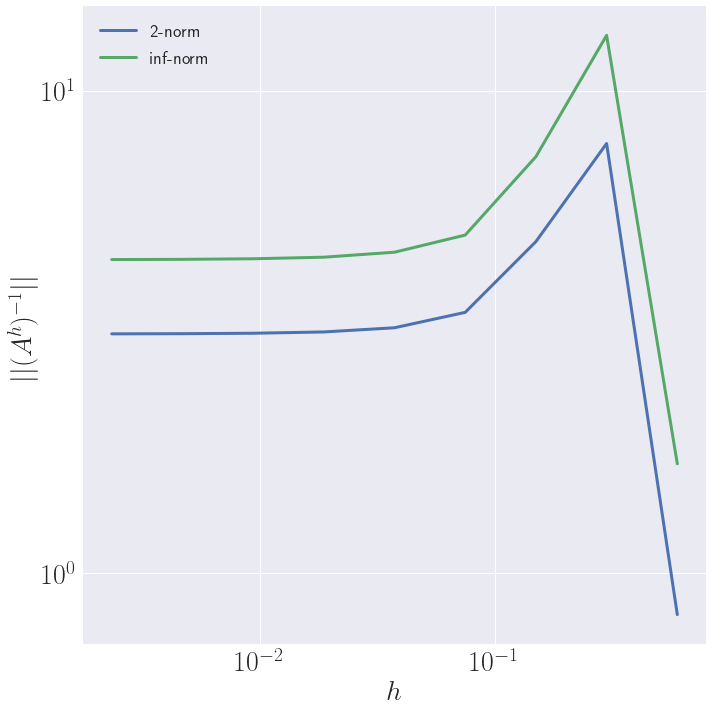

In [98]:
plot_3b_part2()

## Part C

In [104]:
class q3c(object):
    
    def __init__(self, a=-2.0, b=1.0, m=50, alpha=0.0, beta_prime=2.0):
        self.a = a
        self.b = b
        self.m = m
        self.alpha = alpha
        self.beta_prime = beta_prime
        self.h = (b-a)/(m+1) # step size
        self.xpts = a + (arange(m+2))*self.h
        self.U = self.get_U()
    
    def get_all_parameters (self):
        return self.a, self.b, self.m, self.h, self.xpts
    
    def construct_A(self):
    
        # get parameters
        m = self.m
        h = self.h
    
        # Initialize the matrix A
        A = zeros((m+2, m+2))
        # First define the matrix A
        # define the lower and upper diagonals, respectively
        fill_diagonal(A[2:-1,1:-1], 1.0); fill_diagonal(A[1:,2:-1], 1.0)
        # define the on-diagonal terms
        fill_diagonal(A[1:-1,1:-1], -2*(1-8*h*h+4*(arange(1,m+1))*h*h*h))
        # fill_diagonal(A[1:-1,1:-1], -2.0)
        # define the left-hand boundaries
        A[0,0] = 1.0; A[1,0] = 1.0
        # define the right-hand boundaries
        A[-2,-1] = 1.0; A[-1, -2] = -1.0; A[-1,-1] = 1+4*h*h
        # scale entire matrix by 1./h^2
        A *= 1./(h*h)

        return A
    
    def get_Ainv(self):
        
        A = self.construct_A()
        
        return inv(A)
    
    def construct_F(self):
        
        # get parameters
        m = self.m
        h = self.h
        alpha = self.alpha
        beta_prime = self.beta_prime
    
        # initialize the right-hand side
        F = zeros(m+2)
        # define the RHS in the interior of the domain
        F[1:-1] = 16*((arange(1,m+1))*h-1)-4*((arange(1,m+1))**2)*h*h
        # define the LHS and RHS boundary terms, respectively
        F[0] = alpha/(h*h); F[-1] = (beta_prime+2*h)/h
        
        return F
    
    def get_U(self):
    
        A = self.construct_A()
        F = self.construct_F()
        
        return solve(A,F)
    
    def get_plot(self):
        
        fig, ax = subplots(1,1, figsize=(10,10))
        ax.plot(self.xpts, self.U, lw=3.0)

        ax.set_ylabel(r"$U[x]$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        ax.grid(True)
        
        fig.tight_layout()
        fig.savefig("q3c_fig.pdf")

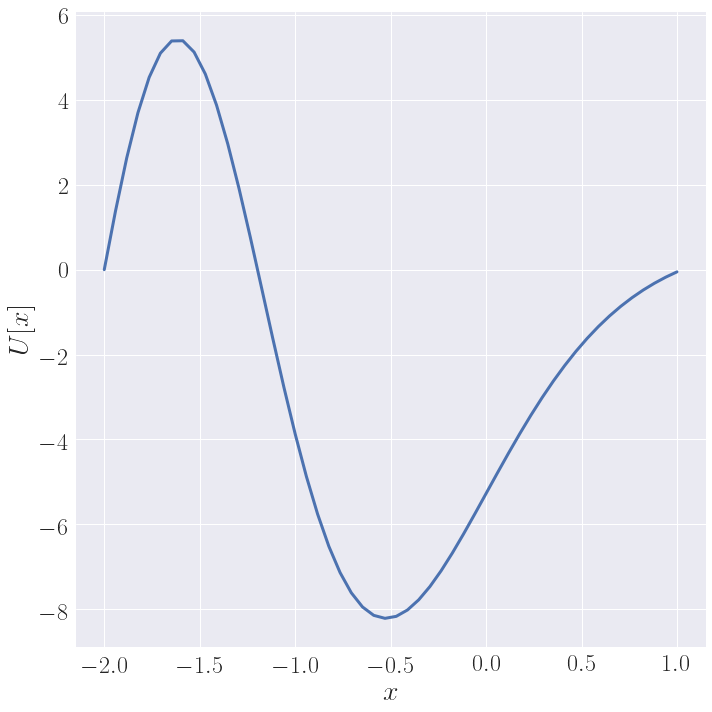

In [105]:
sample_3c = q3c()
sample_3c.get_plot()

In [106]:
def q3c_compute_grid_error_scaling(n=9):
    
        # initialize array for storage
        hvals = zeros(n)
        error_array1_2norm = zeros(n)
        error_array2_2norm = zeros(n)
        error_array1_infnorm = zeros(n)
        error_array2_infnorm = zeros(n)

        # set the number of initial number of internal points
        m_coarse = (2**2)
        # solve on initial mesh
        soln_coarse = q3c(m=m_coarse)

        print(f"m    h        2-norm error  inf-norm error  ratio (2-norm)  ratio (inf-norm)  order (2-norm)  order (inf-norm)")
        
        for i in range(n):

            # define the finer grids
            m_fine = 2*m_coarse + 1

            # construct the meshes and solve 
            soln_fine = q3c(m=m_fine)

            # compute the errors using the grid-2norm
            error_array1_2norm[i] = sqrt(soln_coarse.h)*norm(soln_coarse.U-soln_fine.U[::2], ord=2)

            # compute the errors using the infinity-norm
            error_array1_infnorm[i] = norm(soln_coarse.U-soln_fine.U[::2], ord=inf)

            # record the spacing
            hvals[i] = soln_coarse.h

            # set the current fine grid as the coarse grid for next iteration
            m_coarse = m_fine 
            soln_coarse = soln_fine
            
            if (i > 0):
                print(
                    f"{m_coarse:<5d}"
                    + f"{hvals[i]:<9.5f}"
                    + f"{error_array1_2norm[i]:<14.2e}"
                    + f"{error_array1_infnorm[i]:<16.2e}"
                    + f"{error_array1_2norm[i]/error_array1_2norm[i-1]:<16.5f}"
                    + f"{error_array1_infnorm[i]/error_array1_infnorm[i-1]:<18.5f}"
                    + f"{-log((error_array1_2norm[i]/error_array1_2norm[i-1]).__abs__())/log(2):<16.5f}"
                    + f"{-log((error_array1_infnorm[i]/error_array1_infnorm[i-1]).__abs__())/log(2):<16.5f}"
                    )
            else:
                print(
                    f"{m_coarse:<5d}"
                    + f"{hvals[i]:<9.5f}"
                    + f"{error_array1_2norm[i]:<14.2e}"
                    + f"{error_array1_infnorm[i]:<16.2e}"
                    )

        return hvals, error_array1_2norm, error_array1_infnorm

In [108]:
def plot_3c():
    
    hvals, error_array1_2norm, error_array1_infnorm = q3c_compute_grid_error_scaling()

    fig, ax = subplots(1,1,figsize=(10,10))

    ax.loglog(hvals, error_array1_2norm, lw=3.0, label="2-norm")
    ax.loglog(hvals, error_array1_infnorm, lw=3.0, label="inf-norm")

    ax.loglog(hvals, 10*hvals*hvals, lw=3.0, ls="--", color="gray", label=r"reference $h^{2}$ line")
    
    ax.legend(loc=0, prop={"size":18})
    ax.set_ylabel(r"$E(h)$", fontsize=28)
    ax.set_xlabel(r"$h$", fontsize=28)
    ax.tick_params(labelsize=28)
    ax.grid(True)

    fig.tight_layout()
    fig.savefig("q3c_fig.pdf")

h_value    2-norm error    inf-norm error    ratio (2-norm)    ratio (inf-norm)    order (2-norm)    order (inf-norm)
0.60000    2.25721e+01     1.80420e+01       
0.30000    3.49739e+01     3.26965e+01       1.54943           1.81224             -0.63174          -0.85777          
0.15000    2.67095e+00     2.49645e+00       0.07637           0.07635             3.71086           3.71118           
0.07500    4.63297e-01     4.33051e-01       0.17346           0.17347             2.52734           2.52727           
0.03750    1.07085e-01     1.00103e-01       0.23114           0.23116             2.11318           2.11305           
0.01875    2.62670e-02     2.45574e-02       0.24529           0.24532             2.02743           2.02726           
0.00937    6.53571e-03     6.11153e-03       0.24882           0.24887             2.00683           2.00655           
0.00469    1.63198e-03     1.52609e-03       0.24970           0.24971             2.00172           2.00169        

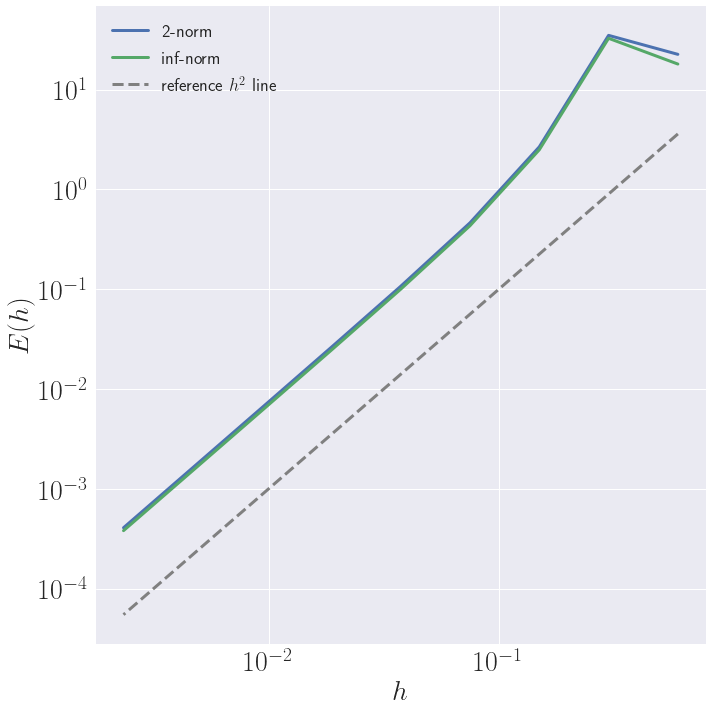

In [109]:
plot_3c()

## Part D

In [138]:
class q3d(object):
    
    def __init__(self, a=-2.0, b=1.0, m=50, alpha=0.0, beta_prime=2.0):
        self.a = a
        self.b = b
        self.m = m
        self.alpha = alpha
        self.beta_prime = beta_prime
        self.h = (b-a)/(m+1) # step size
        self.xpts = a + (arange(m+2))*self.h
        self.U = self.get_U()
    
    def get_all_parameters (self):
        return self.a, self.b, self.m, self.h, self.xpts
    
    def construct_A(self):
    
        # get parameters
        m = self.m
        h = self.h
    
        # Initialize the matrix A
        A = zeros((m+2, m+2))
        # First define the matrix A
        # define the lower and upper diagonals, respectively
        fill_diagonal(A[2:-1,1:-1], 1.0); fill_diagonal(A[1:,2:-1], 1.0)
        # define the on-diagonal terms
        fill_diagonal(A[1:-1,1:-1], -2*(1-8*h*h+4*(arange(1,m+1))*h*h*h))
        # fill_diagonal(A[1:-1,1:-1], -2.0)
        # define the left-hand boundaries
        A[0,0] = 1.0; A[1,0] = 1.0
        # define the right-hand boundaries
        A[-2,-1] = 1.0; A[-1,-3] = 1.0; A[-1, -2] = -4.0; A[-1,-1] = 3.0
        # scale entire matrix by 1./h^2
        A *= 1./(h*h)

        return A
    
    def get_Ainv(self):
        
        A = self.construct_A()
        
        return inv(A)
    
    def construct_F(self):
        
        # get parameters
        m = self.m
        h = self.h
        alpha = self.alpha
        beta_prime = self.beta_prime
    
        # initialize the right-hand side
        F = zeros(m+2)
        # define the RHS in the interior of the domain
        F[1:-1] = 16*((arange(1,m+1))*h-1)-4*((arange(1,m+1))**2)*h*h
        # define the LHS and RHS boundary terms, respectively
        F[0] = alpha/(h*h); F[-1] = (2*beta_prime)/h
        
        return F
    
    def get_U(self):
    
        A = self.construct_A()
        F = self.construct_F()
        
        return solve(A,F)
    
    def get_plot(self):
        
        fig, ax = subplots(1,1, figsize=(10,10))
        ax.plot(self.xpts, self.U, lw=3.0)

        ax.set_ylabel(r"$U[x]$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        ax.grid(True)
        
        fig.tight_layout()
        fig.savefig("q3d_fig.pdf")

In [139]:
def q3d_compute_grid_error_scaling(n=9):
    
        # initialize array for storage
        hvals = zeros(n)
        error_array1_2norm = zeros(n)
        error_array2_2norm = zeros(n)
        error_array1_infnorm = zeros(n)
        error_array2_infnorm = zeros(n)

        # set the number of initial number of internal points
        m_coarse = (2**2)
        # solve on initial mesh
        soln_coarse = q3d(m=m_coarse)

        print(f"m    h        2-norm error  inf-norm error  ratio (2-norm)  ratio (inf-norm)  order (2-norm)  order (inf-norm)")
        
        for i in range(n):

            # define the finer grids
            m_fine = 2*m_coarse + 1

            # construct the meshes and solve 
            soln_fine = q3d(m=m_fine)

            # compute the errors using the grid-2norm
            error_array1_2norm[i] = sqrt(soln_coarse.h)*norm(soln_coarse.U-soln_fine.U[::2], ord=2)

            # compute the errors using the infinity-norm
            error_array1_infnorm[i] = norm(soln_coarse.U-soln_fine.U[::2], ord=inf)

            # record the spacing
            hvals[i] = soln_coarse.h

            # set the current fine grid as the coarse grid for next iteration
            m_coarse = m_fine 
            soln_coarse = soln_fine
            
            if (i > 0):
                print(
                    f"{m_coarse:<5d}"
                    + f"{hvals[i]:<9.5f}"
                    + f"{error_array1_2norm[i]:<14.2e}"
                    + f"{error_array1_infnorm[i]:<16.2e}"
                    + f"{error_array1_2norm[i]/error_array1_2norm[i-1]:<16.5f}"
                    + f"{error_array1_infnorm[i]/error_array1_infnorm[i-1]:<18.5f}"
                    + f"{-log((error_array1_2norm[i]/error_array1_2norm[i-1]).__abs__())/log(2):<16.5f}"
                    + f"{-log((error_array1_infnorm[i]/error_array1_infnorm[i-1]).__abs__())/log(2):<16.5f}"
                    )
            else:
                print(
                    f"{m_coarse:<5d}"
                    + f"{hvals[i]:<9.5f}"
                    + f"{error_array1_2norm[i]:<14.2e}"
                    + f"{error_array1_infnorm[i]:<16.2e}"
                    )

        return hvals, error_array1_2norm, error_array1_infnorm

In [140]:
def plot_3d():
    
    hvals, error_array1_2norm, error_array1_infnorm = q3d_compute_grid_error_scaling()

    fig, ax = subplots(1,1,figsize=(10,10))

    ax.loglog(hvals, error_array1_2norm, lw=3.0, label="2-norm")
    ax.loglog(hvals, error_array1_infnorm, lw=3.0, label="inf-norm")

    ax.loglog(hvals, 10*hvals*hvals, lw=3.0, ls="--", color="gray", label=r"reference $h^{2}$ line")
    
    ax.legend(loc=0, prop={"size":18})
    ax.set_ylabel(r"$E(h)$", fontsize=28)
    ax.set_xlabel(r"$h$", fontsize=28)
    ax.tick_params(labelsize=28)
    ax.grid(True)

    fig.tight_layout()
    fig.savefig("q3d_fig.pdf")

m    h        2-norm error  inf-norm error  ratio (2-norm)  ratio (inf-norm)  order (2-norm)  order (inf-norm)
9    0.60000  2.17e+01      1.73e+01        
19   0.30000  3.39e+01      3.17e+01        1.56414         1.83130           -0.64537        -0.87286        
39   0.15000  2.63e+00      2.46e+00        0.07754         0.07766           3.68894         3.68671         
79   0.07500  4.55e-01      4.26e-01        0.17295         0.17305           2.53156         2.53071         
159  0.03750  1.05e-01      9.83e-02        0.23101         0.23106           2.11394         2.11364         
319  0.01875  2.58e-02      2.41e-02        0.24528         0.24535           2.02749         2.02711         
639  0.00937  6.41e-03      6.00e-03        0.24883         0.24886           2.00677         2.00659         
1279 0.00469  1.60e-03      1.50e-03        0.24971         0.24972           2.00166         2.00164         
2559 0.00234  4.00e-04      3.75e-04        0.24993         0.24993

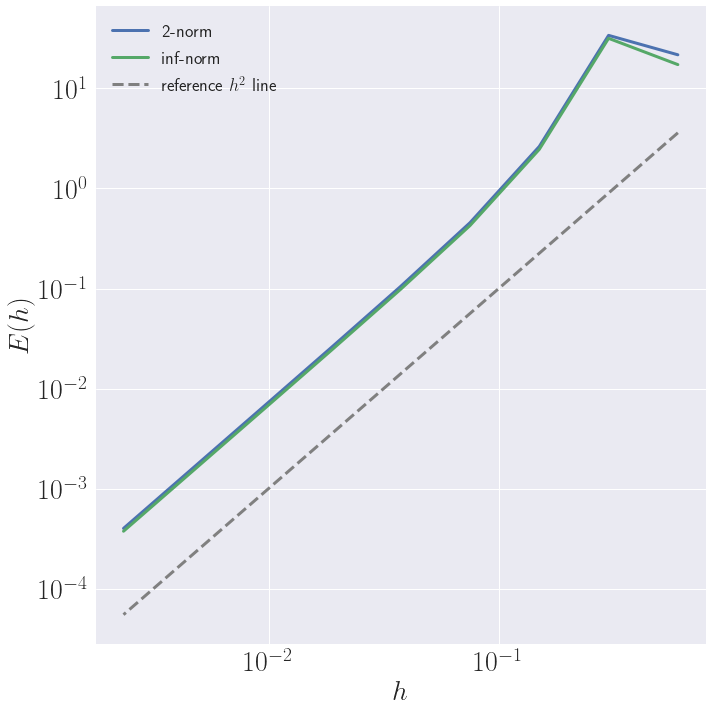

In [141]:
plot_3d()